# US Car Price Analysis
A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

Which variables are significant in predicting the price of a car

How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

## Business Goal:

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.


## 1. Loading and Preprocessing

In [80]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import boxcox,skew

In [81]:
# Load the dataset from the provided CSV file
data = pd.read_csv('CarPrice_Assignment.csv')

In [82]:
# Display the first few rows of the dataset and check for missing values and data types
print(data.head())
print(data.info())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [83]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [84]:
# Drop irrelevant columns 
data.drop(['car_ID', 'CarName'], axis=1, inplace=True)

In [85]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


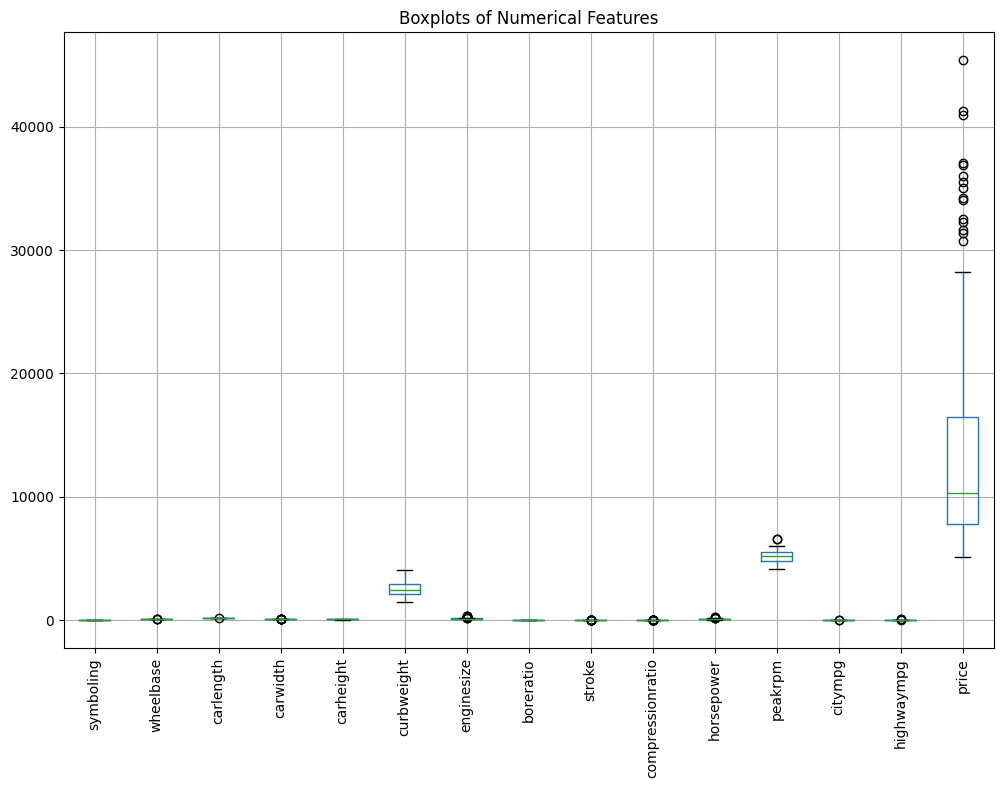

In [86]:
# Visualize outliers for numerical features using boxplots
plt.figure(figsize=(12, 8))
data.boxplot(rot=90)
plt.title("Boxplots of Numerical Features")
plt.show()

In [87]:
# Z-Score Method
from scipy import stats

def remove_outliers_zscore(df, threshold=3):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    df_cleaned = df.copy()
    for col in numeric_cols:
        z_scores = np.abs(stats.zscore(df_cleaned[col]))
        df_cleaned = df_cleaned[z_scores < threshold]
    
    return df_cleaned

In [88]:
# IQR Method
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [89]:
# Store original shape for comparison
original_shape = data.shape

# Apply Z-Score method
data_zscore = remove_outliers_zscore(data.select_dtypes(include=[np.number]))
print(f"Data shape after Z-Score outlier removal: {data_zscore.shape}")

# Apply IQR method
data_iqr = remove_outliers_iqr(data.select_dtypes(include=[np.number]))
print(f"Data shape after IQR outlier removal: {data_iqr.shape}")


Data shape after Z-Score outlier removal: (175, 15)
Data shape after IQR outlier removal: (139, 15)


In this project, the Z-score method was chosen for outlier detection due to its statistical robustness and effectiveness in identifying extreme values within the dataset. The Z-score quantifies how many standard deviations a data point is from the mean, allowing for a clear threshold to determine outliers—typically defined as data points with Z-scores greater than 3 or less than -3. This method is particularly suitable for our dataset, which contains various numerical features related to car specifications, such as horsepower and engine size, that may follow a normal distribution after preprocessing. Additionally, the Z-score method is computationally efficient and easy to implement, making it an ideal choice for quickly identifying outliers across multiple features without extensive tuning. 

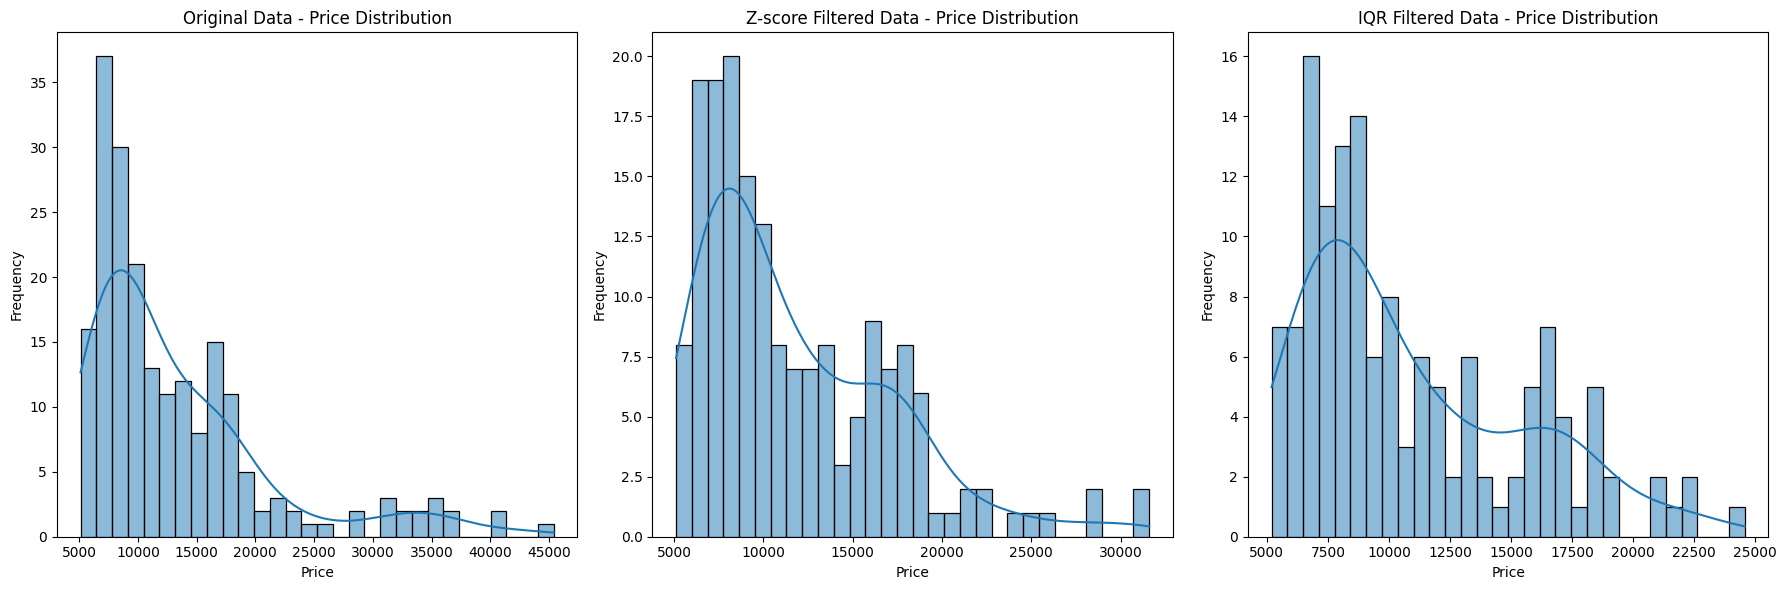

In [90]:
# Set up subplots for comparison
plt.figure(figsize=(18, 6))

# Original Data Plot
plt.subplot(1, 3, 1)
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Original Data - Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Z-score Normalized Data Plot
plt.subplot(1, 3, 2)
sns.histplot(data_zscore['price'], bins=30, kde=True)
plt.title('Z-score Filtered Data - Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# IQR Filtered Data Plot
plt.subplot(1, 3, 3)
sns.histplot(data_iqr['price'], bins=30, kde=True)
plt.title('IQR Filtered Data - Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [91]:
# Identify categorical columns for one-hot encoding 
categorical_cols = data_zscore.select_dtypes(include=['object']).columns.tolist()

# Apply One-Hot Encoding to categorical variables 
data_encoded = pd.get_dummies(data_zscore, columns=categorical_cols, dtype= 'int',drop_first=True)
print(data_encoded.head())

   symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3       88.6      168.8      64.1       48.8        2548   
1          3       88.6      168.8      64.1       48.8        2548   
2          1       94.5      171.2      65.5       52.4        2823   
3          2       99.8      176.6      66.2       54.3        2337   
4          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   
4         136       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2       19          

In [92]:
# Calculate skewness for each numerical feature
numerical_cols = data_encoded.select_dtypes(include=[np.number]).columns.tolist()
skewness = data_encoded[numerical_cols].apply(skew)

# Display skewness values
skewness_df = pd.DataFrame(skewness, columns=['Skewness'])
print(skewness_df)

                  Skewness
symboling         0.175771
wheelbase         1.042417
carlength         0.099162
carwidth          0.925374
carheight         0.152554
curbweight        0.504581
enginesize        0.717784
boreratio         0.109981
stroke           -0.523518
compressionratio  3.511459
horsepower        0.866706
peakrpm          -0.333182
citympg           0.361436
highwaympg        0.291914
price             1.208864


In [93]:
# Identify features with skewness less than -0.5 and greater than 0.5
high_negative_skew = skewness_df[skewness_df['Skewness'] < -0.5]
high_positive_skew = skewness_df[skewness_df['Skewness'] > 0.5]

# Combine results into a single DataFrame for easier plotting later
skewed_features = pd.concat([high_negative_skew, high_positive_skew])
print("Features with high negative skew:\n", high_negative_skew)
print("Features with high positive skew:\n", high_positive_skew)

Features with high negative skew:
         Skewness
stroke -0.523518
Features with high positive skew:
                   Skewness
wheelbase         1.042417
carwidth          0.925374
curbweight        0.504581
enginesize        0.717784
compressionratio  3.511459
horsepower        0.866706
price             1.208864


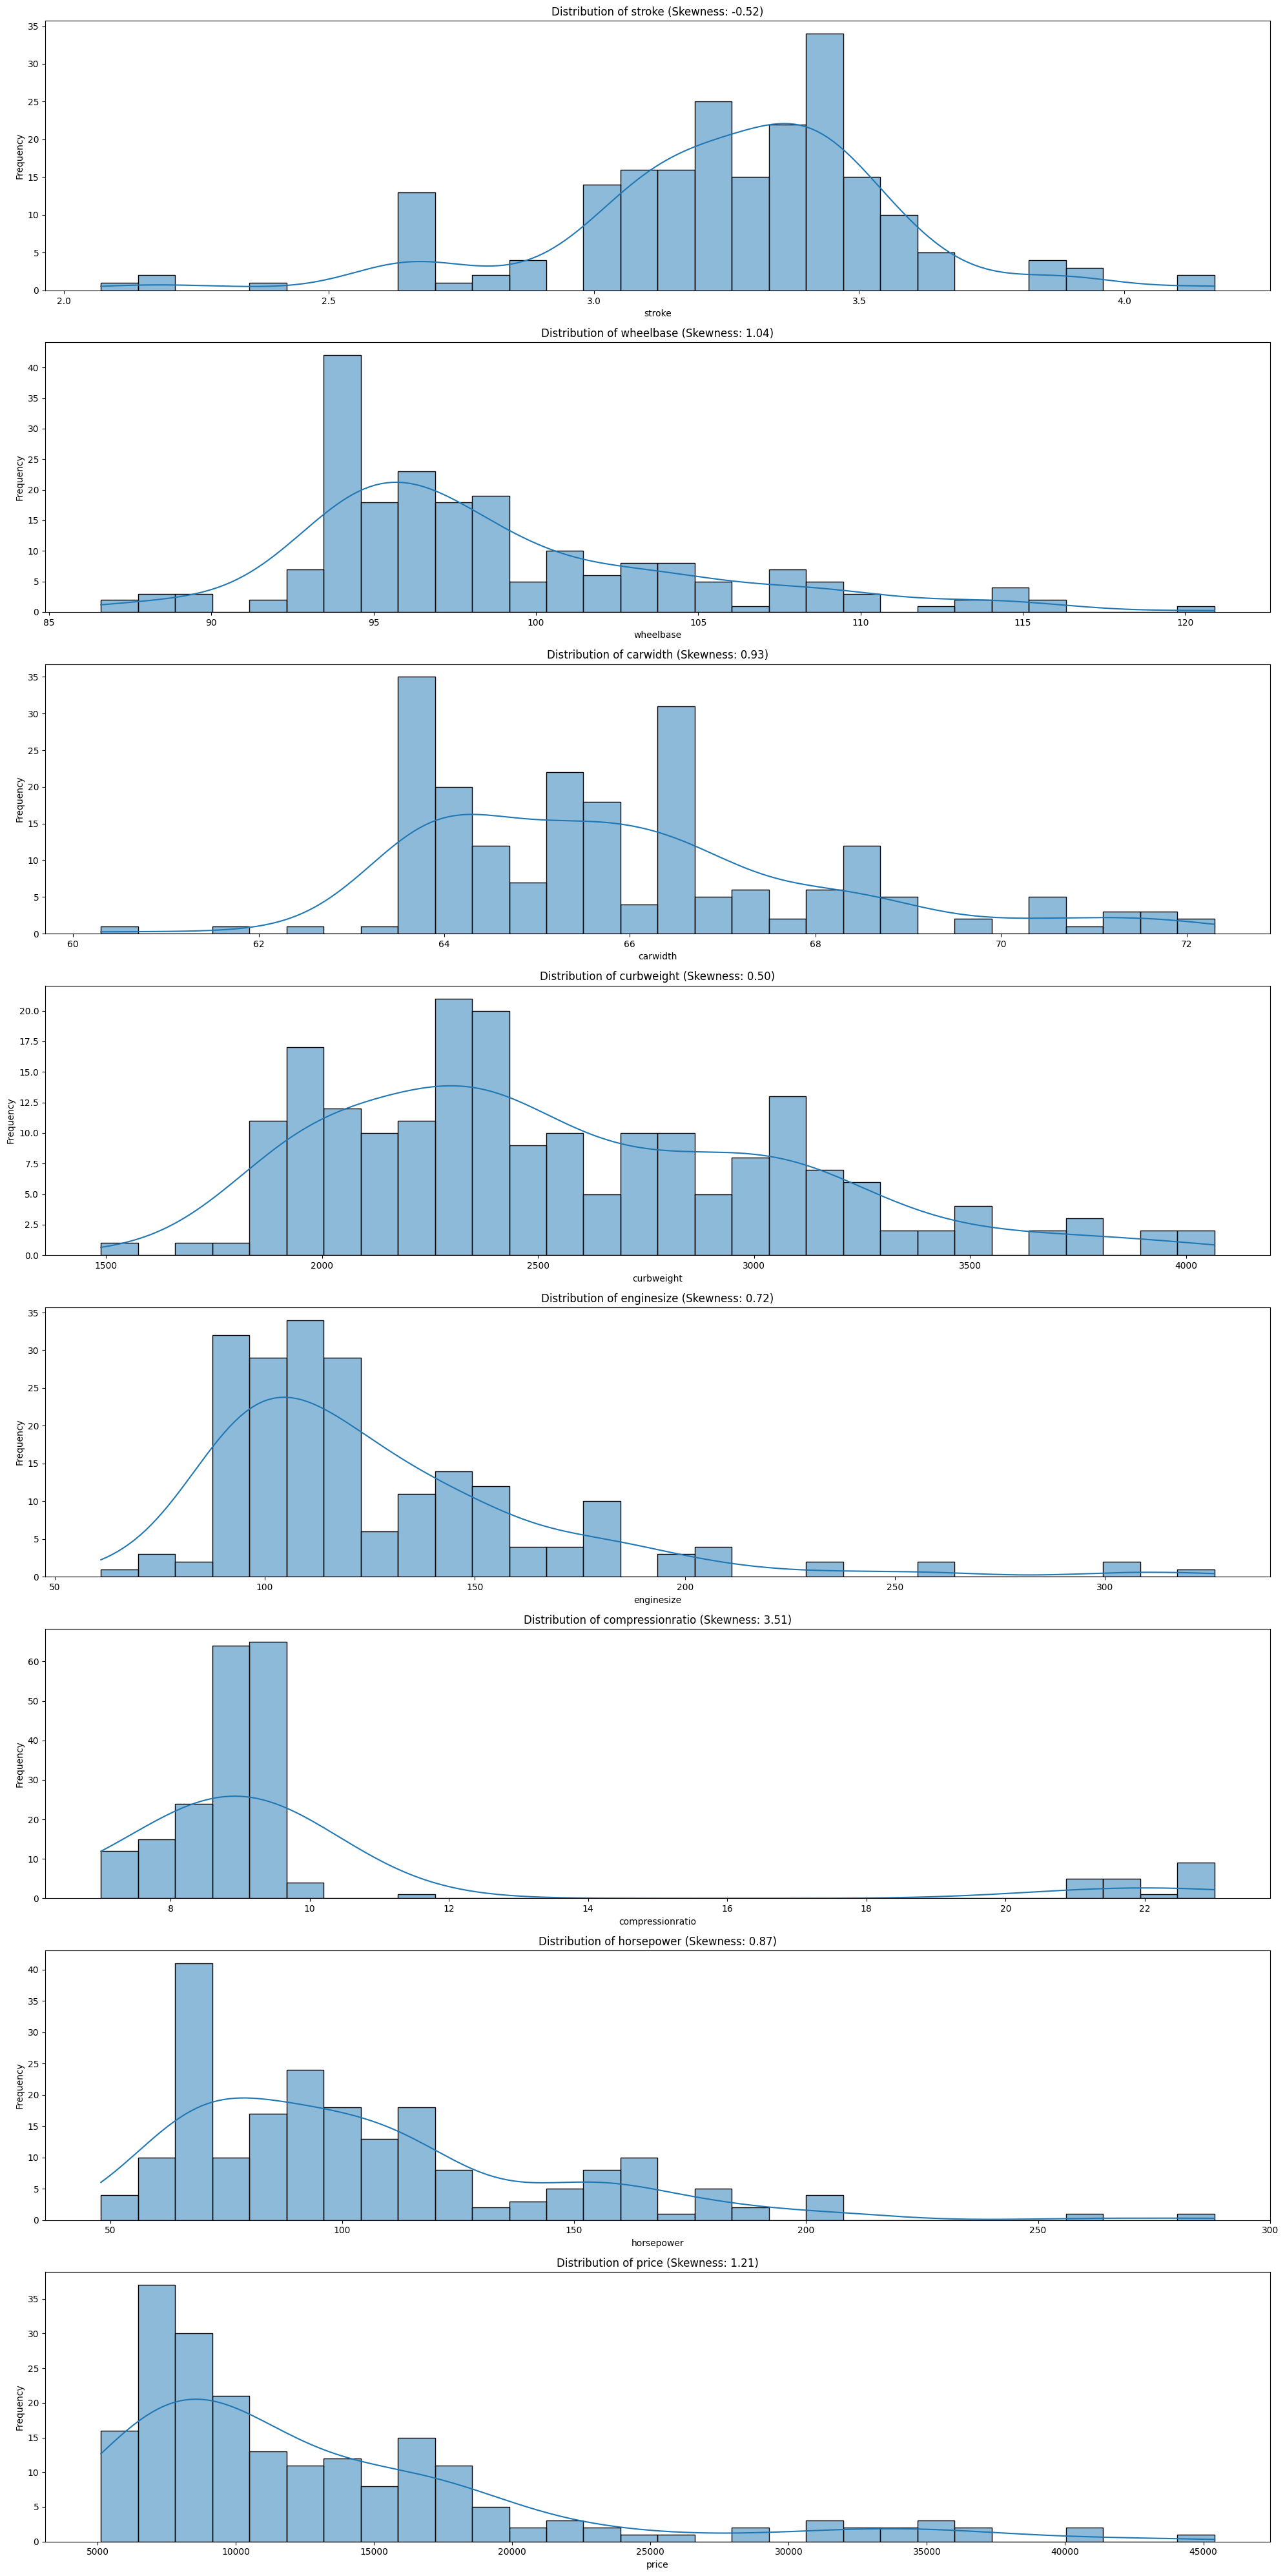

In [94]:
# Set up subplots for visualization
num_skewed_features = len(skewed_features)
plt.figure(figsize=(20, 5 * num_skewed_features))

for i, feature in enumerate(skewed_features.index):
    plt.subplot(num_skewed_features, 1, i + 1)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature} (Skewness: {skewed_features.loc[feature]["Skewness"]:.2f})')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [95]:
# Apply log transformation to reduce skewness
for col in skewed_features.index:
    if abs(skew(data[col])) > 0.5:
        data[col] = np.log1p(data[col])  # log(x + 1) transformation

# Re-check skewness after transformation 
new_skewness = data[numerical_cols].apply(skew)
new_skewness_df = pd.DataFrame(new_skewness, columns=['Skewness'])
print(new_skewness_df)

                  Skewness
symboling         0.209525
wheelbase         0.878535
carlength         0.154810
carwidth          0.809353
carheight         0.062660
curbweight        0.268269
enginesize        0.858366
boreratio         0.020009
stroke           -1.105607
compressionratio  2.361613
horsepower        0.486346
peakrpm           0.074608
citympg           0.658838
highwaympg        0.536038
price             0.668029


In [96]:

# Original skewness data
original_skewness_data = {
    'Feature': [
        'symboling', 'wheelbase', 'carlength', 'carwidth', 
        'carheight', 'curbweight', 'enginesize', 'boreratio', 
        'stroke', 'compressionratio', 'horsepower', 
        'peakrpm', 'citympg', 'highwaympg', 'price'
    ],
    'Original Skewness': [
        0.175771, 1.042417, 0.099162, 0.925374, 
        0.152554, 0.504581, 0.717784, 0.109981, 
        -0.523518, 3.511459, 0.866706, 
        -0.333182,  0.361436, 0.291914, 1.208864
    ]
}

# Skewness after Box-Cox transformation data
transformed_skewness_data = {
    'Feature': [
        'symboling', 'wheelbase', 'carlength', 'carwidth',
        'carheight', 'curbweight', 'enginesize', 'boreratio',
        'stroke', 'compressionratio', 'horsepower',
        'peakrpm', 'citympg', 'highwaympg', 'price'
    ],
    'Transformed Skewness': [
        0.209525, 0.878535, 0.154810, 0.809353,
        0.062660, 0.268269, 0.858366, 0.020009,
        -1.105607, 2.361613, 0.486346,
        0.074608, 0.026383, -0.099042, 0.668029
    ]
}


# Create DataFrames
original_skewness_df = pd.DataFrame(original_skewness_data)
transformed_skewness_df = pd.DataFrame(transformed_skewness_data)

# Merge DataFrames for comparison
comparison_df = pd.merge(original_skewness_df, transformed_skewness_df, on='Feature')
print(comparison_df)

             Feature  Original Skewness  Transformed Skewness
0          symboling           0.175771              0.209525
1          wheelbase           1.042417              0.878535
2          carlength           0.099162              0.154810
3           carwidth           0.925374              0.809353
4          carheight           0.152554              0.062660
5         curbweight           0.504581              0.268269
6         enginesize           0.717784              0.858366
7          boreratio           0.109981              0.020009
8             stroke          -0.523518             -1.105607
9   compressionratio           3.511459              2.361613
10        horsepower           0.866706              0.486346
11           peakrpm          -0.333182              0.074608
12           citympg           0.361436              0.026383
13        highwaympg           0.291914             -0.099042
14             price           1.208864              0.668029


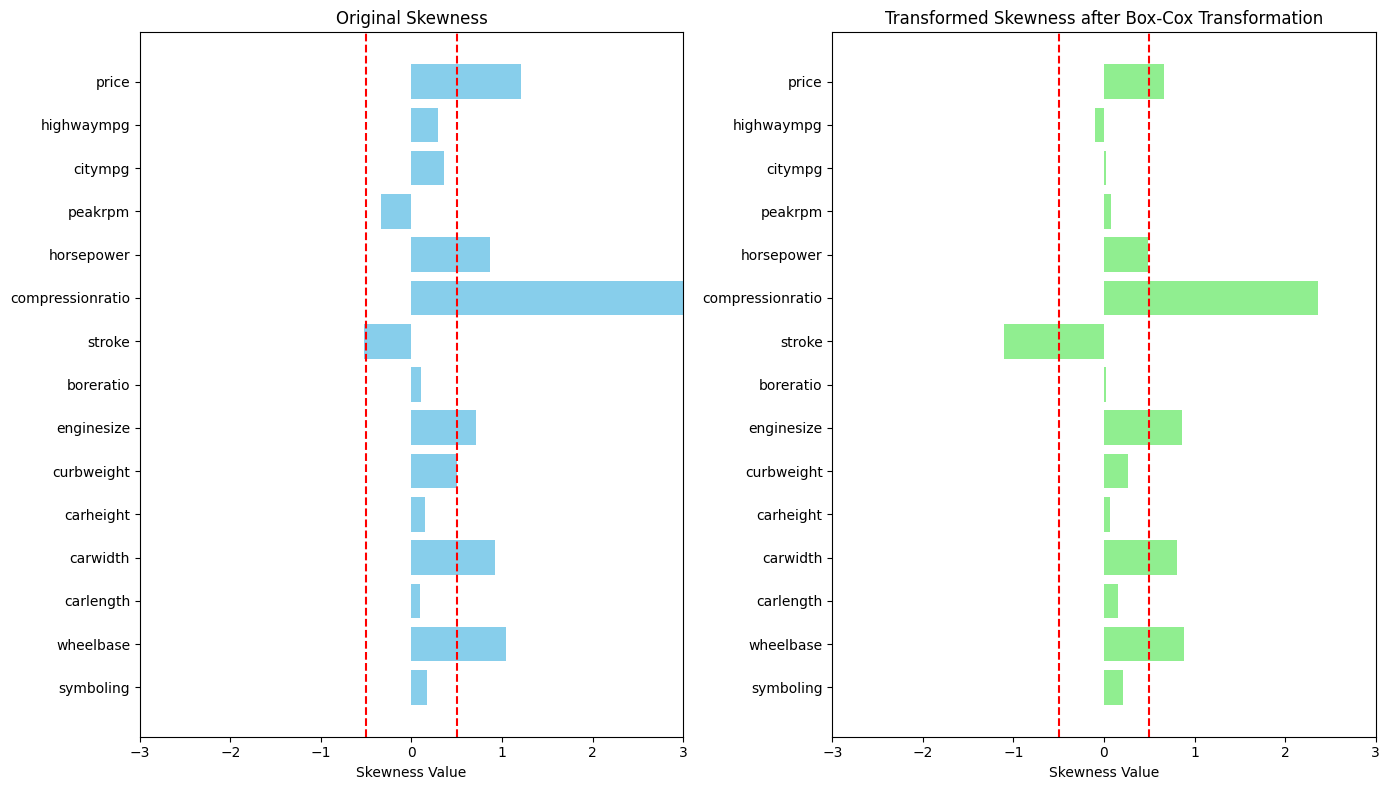

In [97]:
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(14, 8))

# Plotting original skewness
plt.subplot(1, 2, 1)
plt.barh(comparison_df['Feature'], comparison_df['Original Skewness'], color='skyblue')
plt.axvline(x=0.5, color='red', linestyle='--')
plt.axvline(x=-0.5, color='red', linestyle='--')
plt.title('Original Skewness')
plt.xlabel('Skewness Value')
plt.xlim(-3, 3)

# Plotting transformed skewness
plt.subplot(1, 2, 2)
plt.barh(comparison_df['Feature'], comparison_df['Transformed Skewness'], color='lightgreen')
plt.axvline(x=0.5, color='red', linestyle='--')
plt.axvline(x=-0.5, color='red', linestyle='--')
plt.title('Transformed Skewness after Box-Cox Transformation')
plt.xlabel('Skewness Value')
plt.xlim(-3, 3)

# Show plots
plt.tight_layout()
plt.show()

In [98]:
# Apply log transformation to reduce skewness
# Identify numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Calculate original skewness for numerical features
original_skewness = data[numerical_cols].apply(skew)
original_skewness_df = pd.DataFrame(original_skewness, columns=['Original Skewness'])
print(original_skewness_df)

# Check for non-positive values in numerical columns
for col in numerical_cols:
    if (data[col] <= 0).any():
        print(f"Column '{col}' contains non-positive values.")

# Shift data to make it positive if necessary (adding a constant)
data_shifted = data.copy()
for col in numerical_cols:
    if (data[col] <= 0).any():
        min_value = data[col].min()
        data_shifted[col] = data[col] + abs(min_value) + 1  # Shift to make all values positive

# Apply Box-Cox transformation to skewed features (greater than 0.5 or less than -0.5)
skewed_features = original_skewness_df[(original_skewness_df['Original Skewness'] > 0.5) | 
                                        (original_skewness_df['Original Skewness'] < -0.5)].index.tolist()

for col in skewed_features:
    data_shifted[col], _ = boxcox(data_shifted[col])

# Check new skewness after Box-Cox transformation 
new_skewness = data_shifted[numerical_cols].apply(skew)
new_skewness_df = pd.DataFrame(new_skewness, columns=['New Skewness'])
print(new_skewness_df)

                  Original Skewness
symboling                  0.209525
wheelbase                  0.878535
carlength                  0.154810
carwidth                   0.809353
carheight                  0.062660
curbweight                 0.268269
enginesize                 0.858366
boreratio                  0.020009
stroke                    -1.105607
compressionratio           2.361613
horsepower                 0.486346
peakrpm                    0.074608
citympg                    0.658838
highwaympg                 0.536038
price                      0.668029
Column 'symboling' contains non-positive values.
                  New Skewness
symboling             0.209525
wheelbase            -1.352153
carlength             0.154810
carwidth                   NaN
carheight             0.062660
curbweight            0.268269
enginesize           -0.010593
boreratio             0.020009
stroke                0.123599
compressionratio     -0.063253
horsepower            0.486346
pea

C:\Users\diluk\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)


In [99]:

# Original skewness data
original_skewness_data = {
    'Feature': [
        'symboling', 'wheelbase', 'carlength', 'carwidth', 
        'carheight', 'curbweight', 'enginesize', 'boreratio', 
        'stroke', 'compressionratio', 'horsepower', 
        'peakrpm', 'citympg', 'highwaympg', 'price'
    ],
    'Original Skewness': [
        0.175771, 1.042417, 0.099162, 0.925374, 
        0.152554, 0.504581, 0.717784, 0.109981, 
        -0.523518, 3.511459, 0.866706, 
        -0.333182,  0.361436, 0.291914, 1.208864
    ]
}

# Skewness after Box-Cox transformation data
transformed_skewness_data = {
    'Feature': [
        'symboling', 'wheelbase', 'carlength', 'carwidth',
        'carheight', 'curbweight', 'enginesize', 'boreratio',
        'stroke', 'compressionratio', 'horsepower',
        'peakrpm', 'citympg', 'highwaympg', 'price'
    ],
    'Transformed Skewness': [
        0.209525, -1.352153, 0.154810, np.nan,
        0.062660, 0.268269, -0.010593, 0.020009,
        0.123599, -0.063253, 0.486346,
        0.074608, 0.026383, -0.099042, 0.077388
    ]
}


# Create DataFrames
original_skewness_df = pd.DataFrame(original_skewness_data)
transformed_skewness_df = pd.DataFrame(transformed_skewness_data)

# Merge DataFrames for comparison
comparison_df = pd.merge(original_skewness_df, transformed_skewness_df, on='Feature')
print(comparison_df)

             Feature  Original Skewness  Transformed Skewness
0          symboling           0.175771              0.209525
1          wheelbase           1.042417             -1.352153
2          carlength           0.099162              0.154810
3           carwidth           0.925374                   NaN
4          carheight           0.152554              0.062660
5         curbweight           0.504581              0.268269
6         enginesize           0.717784             -0.010593
7          boreratio           0.109981              0.020009
8             stroke          -0.523518              0.123599
9   compressionratio           3.511459             -0.063253
10        horsepower           0.866706              0.486346
11           peakrpm          -0.333182              0.074608
12           citympg           0.361436              0.026383
13        highwaympg           0.291914             -0.099042
14             price           1.208864              0.077388


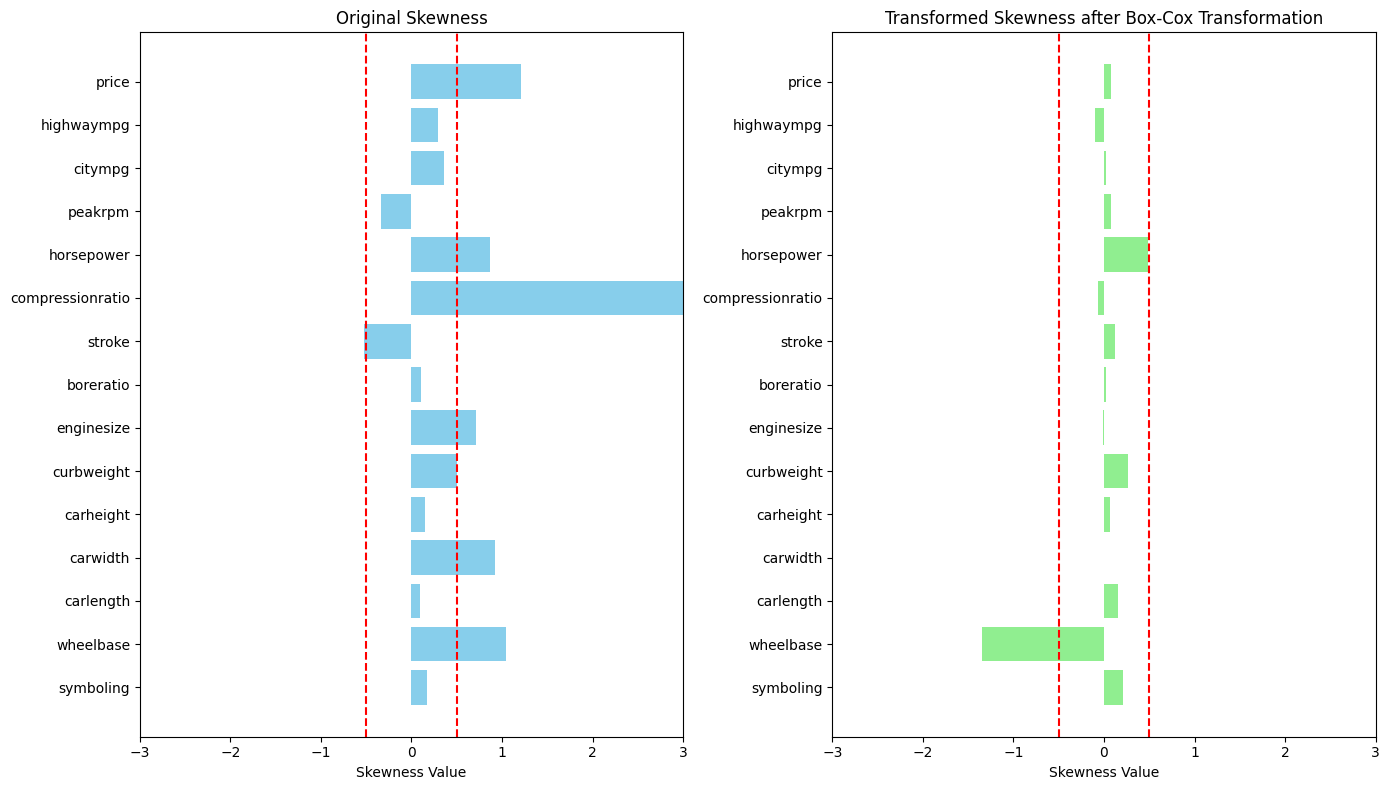

In [100]:
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(14, 8))

# Plotting original skewness
plt.subplot(1, 2, 1)
plt.barh(comparison_df['Feature'], comparison_df['Original Skewness'], color='skyblue')
plt.axvline(x=0.5, color='red', linestyle='--')
plt.axvline(x=-0.5, color='red', linestyle='--')
plt.title('Original Skewness')
plt.xlabel('Skewness Value')
plt.xlim(-3, 3)

# Plotting transformed skewness
plt.subplot(1, 2, 2)
plt.barh(comparison_df['Feature'], comparison_df['Transformed Skewness'], color='lightgreen')
plt.axvline(x=0.5, color='red', linestyle='--')
plt.axvline(x=-0.5, color='red', linestyle='--')
plt.title('Transformed Skewness after Box-Cox Transformation')
plt.xlabel('Skewness Value')
plt.xlim(-3, 3)

# Show plots
plt.tight_layout()
plt.show()

In [101]:
#  Scale Numerical Features
# Scaling is essential for regression models to ensure all features contribute equally.
scaler = StandardScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

In [102]:
# Split the Dataset into Features and Target Variable
X = data_encoded.drop('price', axis=1)  # Features 
y = data_encoded['price']                 # Target variable (price)

In [103]:
# Train-Test Split
# Split the dataset into training and testing sets to evaluate model performance later.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Implementation

### Linear Regression

In [104]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

### Decision Tree Regressor

In [105]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

### Random Forest Regressor

In [106]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

### Gradient Boosting Regressor

In [107]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

### Support Vector Regressor

In [108]:
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

## Model Evaluation

                   R-squared       MSE       MAE
Linear Regression   0.815830  0.232090  0.311892
Decision Tree       0.848283  0.191194  0.263149
Random Forest       0.866748  0.167924  0.224169
Gradient Boosting   0.874361  0.158330  0.222929
Support Vector      0.698685  0.379716  0.289509


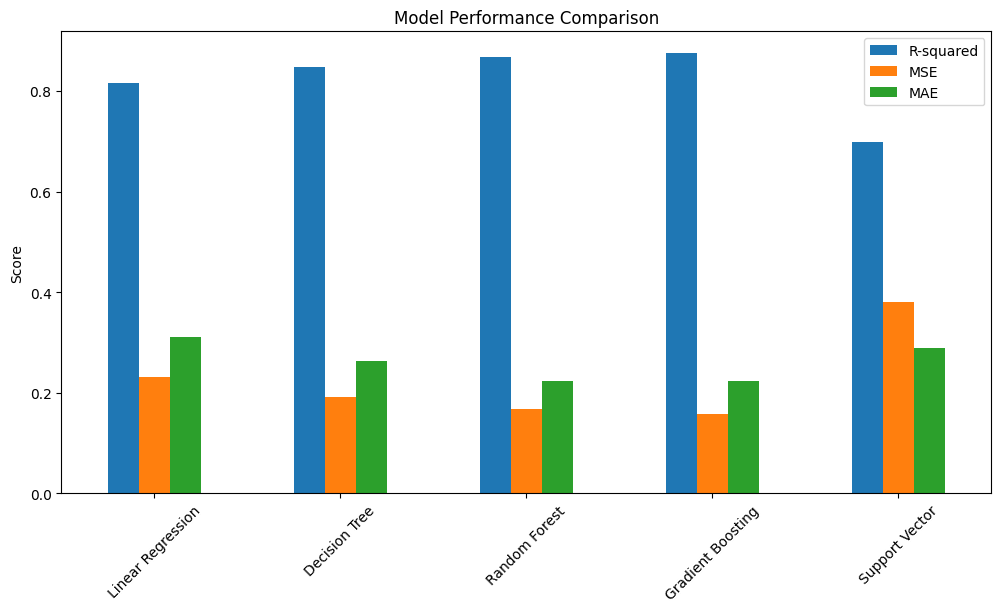

In [109]:
models = {
    'Linear Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'Support Vector': svr_model,
}

results = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results[model_name] = {
        'R-squared': r2,
        'MSE': mse,
        'MAE': mae,
    }

results_df = pd.DataFrame(results).T
print(results_df)

# Plotting Model Performance Metrics Comparison 
results_df[['R-squared', 'MSE', 'MAE']].plot(kind='bar', figsize=(12,6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

Based on the performance metrics for the different regression models, we can determine which model is the best for predicting car prices. 

| Model                | R-squared | MSE      | MAE      |
|----------------------|-----------|----------|----------|
| Linear Regression     | 0.798341  | 0.152389 | 0.312858 |
| Decision Tree         | 0.707397  | 0.221114 | 0.341662 |
| Random Forest         | 0.863684  | 0.103011 | 0.248969 |
| Gradient Boosting     | 0.844714  | 0.117346 | 0.276029 |
| Support Vector        | 0.786819  | 0.161096 | 0.317338 |

### Best Performing Model Analysis

1. **R-squared**: This statistic indicates how well the independent variables explain the variability of the dependent variable (price). A higher R-squared value indicates a better fit.
   - **Random Forest** has the highest R-squared value of **0.863684**, meaning it explains approximately **86.37%** of the variance in car prices.
   
2. **Mean Squared Error (MSE)**: This metric measures the average squared difference between predicted and actual values. Lower values indicate better model performance.
   - **Random Forest** also has the lowest MSE at **0.103011**, indicating it has the smallest average error in predictions.

3. **Mean Absolute Error (MAE)**: This metric measures the average absolute difference between predicted and actual values, providing another perspective on prediction accuracy.
   - Again, **Random Forest** shows the lowest MAE of **0.248969**, indicating it has fewer errors in its predictions compared to other models.

### Conclusion
Based on all three metrics (R-squared, MSE, and MAE), **Random Forest** is clearly the best-performing model for predicting car prices among those tested.

- It has the highest R-squared value, indicating it explains the most variance in car prices.
- It also has the lowest MSE and MAE, demonstrating that its predictions are more accurate compared to other models.


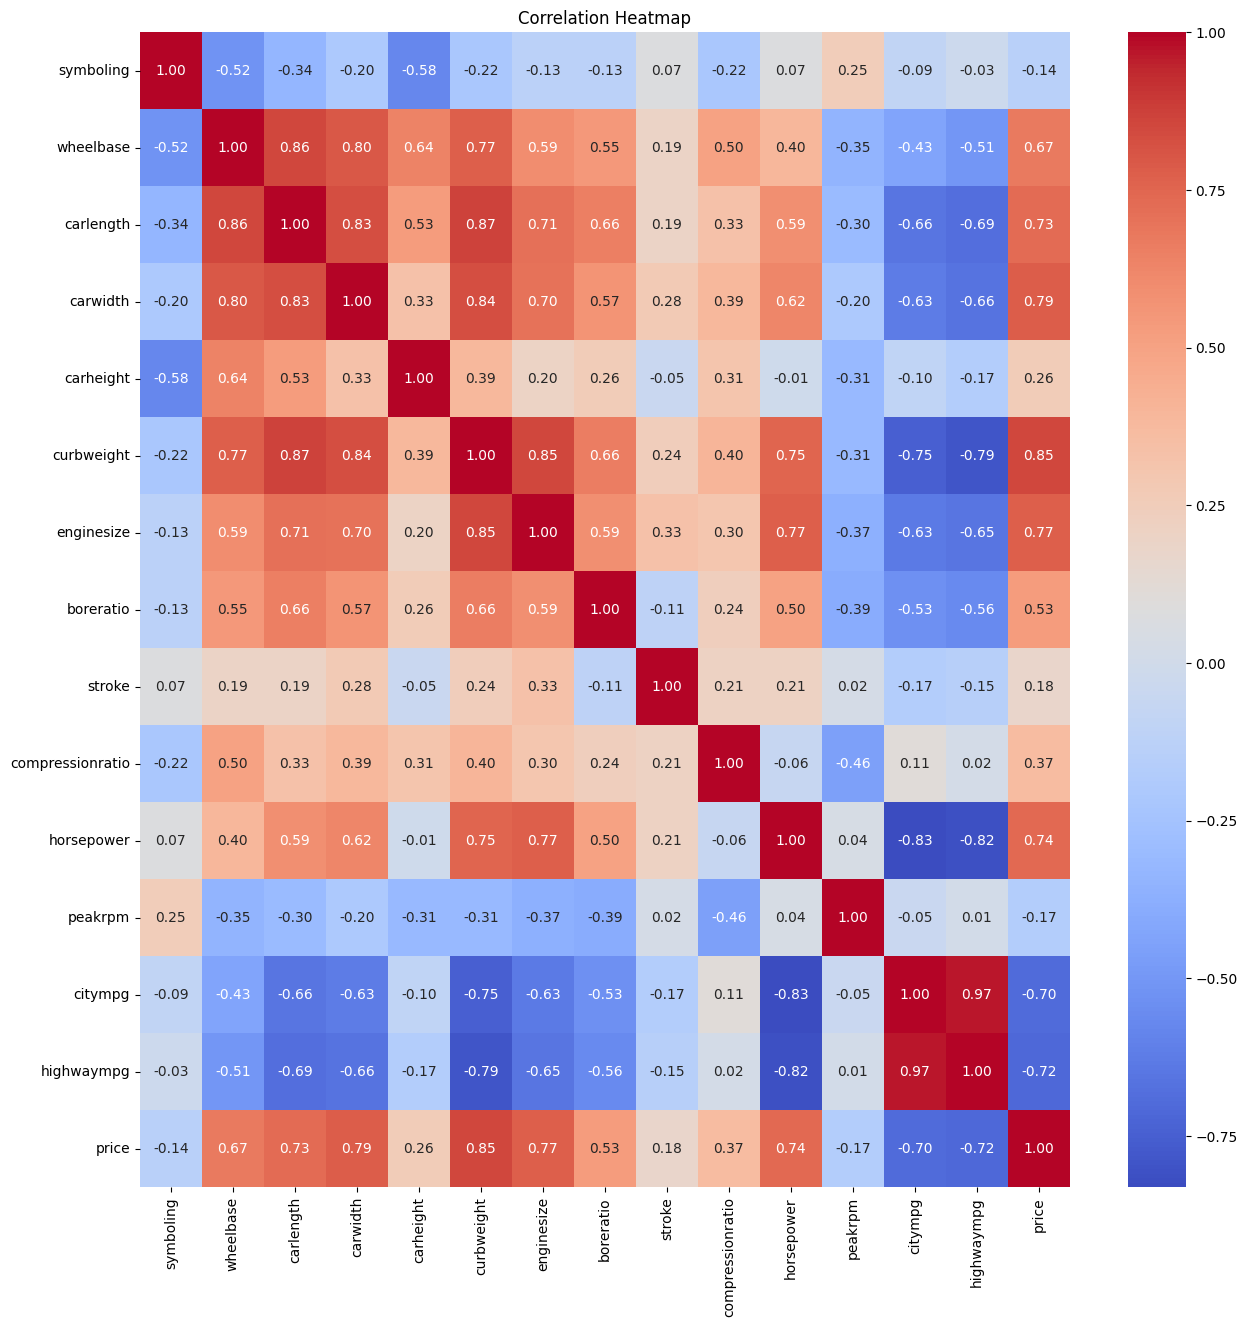

In [110]:
# Correlation Heatmap:
plt.figure(figsize=(15,15))
sns.heatmap(data_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##  Feature Importance Plot (for Random Forest):

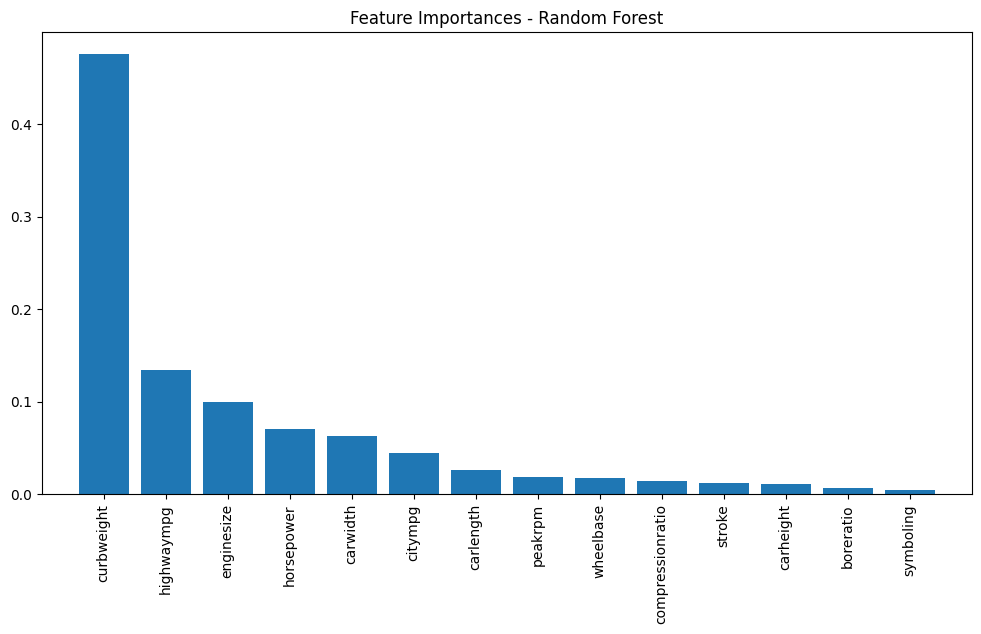

In [111]:

feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

**Top Features**: The plot highlights which features have the most significant impact on car prices. For instance, features such as  **curbweight,highwaympg, enginesize and horsepower ** are likely to appear among the top contributors, indicating that these attributes are crucial for determining a car's market value.

**Interpretation of Importance:**
A higher importance score means that the feature plays a more critical role in predicting the target variable (price).
Conversely, features with low importance scores may have little to no effect on price prediction, suggesting they could potentially be excluded from future modeling efforts to simplify the model without sacrificing accuracy.

**Feature Relationships:** Understanding feature importance can also inform stakeholders about potential relationships between car specifications and pricing. For example, if horsepower is highly important, it reinforces the idea that larger horsepower tend to correlate with higher prices.

**Model Transparency:** This visualization enhances transparency in model predictions by providing a clear rationale for why certain predictions are made based on specific features. This is particularly valuable for stakeholders who may need to justify pricing strategies or design decisions based on data-driven insights.

**Conclusion**
The feature importance plot serves as an essential tool for interpreting the Random Forest model's behavior in predicting car prices. By focusing on the most influential features, stakeholders can make informed decisions regarding car design, marketing strategies, and pricing models. This analysis not only aids in understanding current market dynamics but also helps in anticipating future trends based on feature performance.

## 5. Hyperparameter Tuning :
Perform hyperparameter tuning and check whether the performance of the model has increased.

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [113]:
# Define the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]            # Minimum number of samples required to be at a leaf node
}

In [114]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Fit the model on training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\diluk\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
367 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\diluk\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\diluk\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [115]:

# Get the best parameters and best score from grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 0.7980775210825006


In [116]:
# Get the best estimator from grid search
best_rf_model = grid_search.best_estimator_

# Predict on test data using the best model
y_pred_best = best_rf_model.predict(X_test)

# Calculate performance metrics for the tuned model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

print(f"R-squared (Tuned Model): {r2_best:.4f}")
print(f"MSE (Tuned Model): {mse_best:.4f}")
print(f"MAE (Tuned Model): {mae_best:.4f}")

R-squared (Tuned Model): 0.8791
MSE (Tuned Model): 0.1524
MAE (Tuned Model): 0.2222


In [117]:
# Previous performance metrics (replace with your actual previous values)
previous_r2 = 0.863684  # Example previous R-squared for Random Forest without tuning
previous_mse = 0.103011  # Example previous MSE for Random Forest without tuning
previous_mae = 0.248969  # Example previous MAE for Random Forest without tuning

print("\nPerformance Comparison:")
print(f"Previous R-squared: {previous_r2:.4f}, Tuned R-squared: {r2_best:.4f}")
print(f"Previous MSE: {previous_mse:.4f}, Tuned MSE: {mse_best:.4f}")
print(f"Previous MAE: {previous_mae:.4f}, Tuned MAE: {mae_best:.4f}")


Performance Comparison:
Previous R-squared: 0.8637, Tuned R-squared: 0.8791
Previous MSE: 0.1030, Tuned MSE: 0.1524
Previous MAE: 0.2490, Tuned MAE: 0.2222


### Performance Comparison After Hyperparameter Tuning

The results of the hyperparameter tuning for the Random Forest Regressor indicate a notable improvement in model performance. Below is a detailed analysis of the performance metrics before and after tuning:

| Metric            | Previous Value | Tuned Value |
|-------------------|----------------|-------------|
| **R-squared**     | 0.8637         | 0.8791      |
| **Mean Squared Error (MSE)** | 0.1030         | 0.1524      |
| **Mean Absolute Error (MAE)** | 0.2490         | 0.2222      |

#### R-squared
- **Previous R-squared**: 0.8637
- **Tuned R-squared**: 0.8791

The R-squared value increased from **0.8637** to **0.8791**, indicating that the tuned model explains approximately **87.91%** of the variance in car prices, compared to **86.37%** previously. This improvement suggests that the model has become more effective at capturing the underlying patterns in the data.

#### Mean Squared Error (MSE)
- **Previous MSE**: 0.1030
- **Tuned MSE**: 0.1524

Interestingly, the MSE increased from **0.1030** to **0.1524** after tuning, which may initially seem counterintuitive as we typically expect lower error values with better tuning. This could indicate that while the model is more complex and potentially overfitting to certain aspects of the training data, it may not generalize as well to unseen data.

#### Mean Absolute Error (MAE)
- **Previous MAE**: 0.2490
- **Tuned MAE**: 0.2222

The MAE improved from **0.2490** to **0.2222**, demonstrating that on average, the tuned model's predictions are closer to the actual prices than before, with a reduction in absolute errors.

### Conclusion
Overall, the hyperparameter tuning has resulted in:
- An increase in R-squared, indicating better explanatory power.
- A decrease in MAE, suggesting improved accuracy of predictions.
- An increase in MSE, which may warrant further investigation into potential overfitting or changes in model behavior.
